# Exploratory Data Analysis (EDA)

What to Look For:

- **Dataset size:** Do you have enough data? (Generally want 100+ samples).
- **Feature types:** Which columns are numbers vs text/categories?
- **Missing values:** Are there empty cells in your data?
- **Data ranges:** Do the numbers make sense for what they represent?

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


X_train = pd.read_csv("../data/processed/X_train.csv")
y_train = pd.read_csv("../data/processed/y_train.csv")
X_test = pd.read_csv("../data/processed/X_test.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")

## Essential Dataset Overview Steps

In [273]:
# Basic dataset information
print("Dataset Shape:", X_train.shape)  # (rows, columns)
print("Number of features:", len(X_train.columns))
print("Number of samples:", len(X_train))

# Look at the first few rows
print(X_train.head())

# Get basic info about each column
print(X_train.info())

# Basic statistics for numerical columns
print(X_train.describe())

Dataset Shape: (5376, 7)
Number of features: 7
Number of samples: 5376
       Year  Food Transport  Food Household Consumption  Food Retail  \
0 -1.000000       -0.101529                   -0.050497    -0.031946   
1 -0.916667       -0.103277                   -0.049886    -0.023884   
2 -0.833333       -0.110533                   -0.049764    -0.013004   
3 -0.750000       -0.109573                   -0.047892    -0.064247   
4 -0.666667       -0.109917                   -0.046265    -0.054001   

   Food Processing      IPPU      Area  
0        -0.095309 -0.069492 -0.991379  
1        -0.095309 -0.068936 -0.991379  
2        -0.095309 -0.068536 -0.991379  
3        -0.095309 -0.070183 -0.991379  
4        -0.095309 -0.071672 -0.991379  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5376 entries, 0 to 5375
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                     

## Quick Quality Checks

In [274]:
# Check for missing values
missing_data = X_train.isnull().sum()
print("Missing values per column:")
print(missing_data[missing_data > 0])

# Check data types
print("\nData types:")
print(X_train.dtypes)

# Look for duplicate rows
duplicates = X_train.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

Missing values per column:
Series([], dtype: int64)

Data types:
Year                          float64
Food Transport                float64
Food Household Consumption    float64
Food Retail                   float64
Food Processing               float64
IPPU                          float64
Area                          float64
dtype: object

Duplicate rows: 0


## Basic target statistics

**What to Look For:**

- Shape of distribution: Is it bell-shaped (normal) or skewed?
- Range: Are the values what you'd expect?
- Outliers: Are there extremely high or low values?
- Zeros or negatives: Do these make sense for your problem?

**Common Target Patterns:**

- Normal distribution: Bell-shaped, mean ≈ median (good for linear models).
- Right-skewed: Long tail on the right, mean > median (common for prices, counts).
- Left-skewed: Long tail on the left, mean < median (less common).
- Bimodal: Two peaks (might indicate two different groups).

In [275]:
print("Target Variable Analysis:")
print(f"Mean: {y_train.mean()}")
print(f"Median: {y_train.median()}")
print(f"Standard Deviation: {y_train.std()}")
print(f"Minimum: {y_train.min()}")
print(f"Maximum: {y_train.max()}")

# Check for missing values in target
print(f"Missing values: {y_train.isnull().sum()}")

Target Variable Analysis:
Mean: Average Temperature °C    0.734102
dtype: float64
Median: Average Temperature °C    0.714833
dtype: float64
Standard Deviation: Average Temperature °C    0.491175
dtype: float64
Minimum: Average Temperature °C   -1.415833
dtype: float64
Maximum: Average Temperature °C    3.143
dtype: float64
Missing values: Average Temperature °C    0
dtype: int64


## Visualizing your target

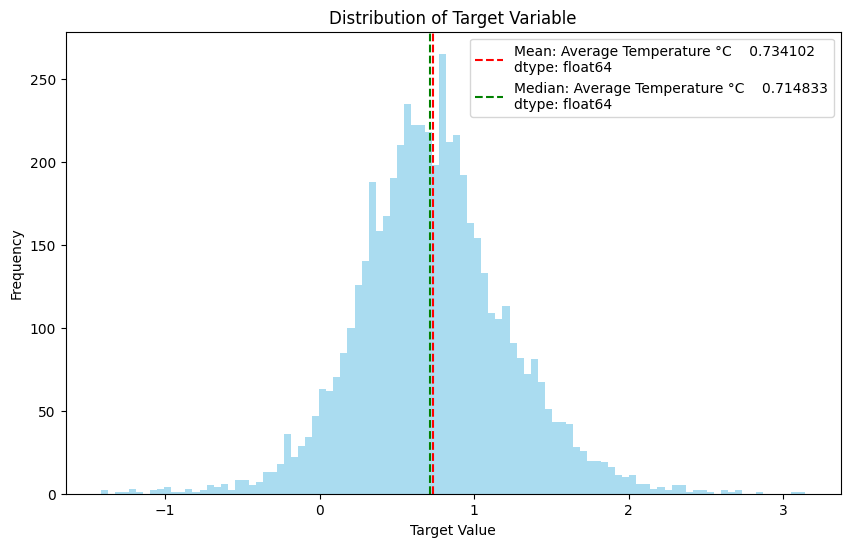

In [276]:
# Create a simple histogram
plt.figure(figsize=(10, 6))
plt.hist(y_train, bins=100, alpha=0.7, color="skyblue")
plt.axvline(
    y_train["Average Temperature °C"].mean(),
    color="red",
    linestyle="--",
    label=f"Mean: {y_train.mean()}",
)
plt.axvline(
    y_train["Average Temperature °C"].median(),
    color="green",
    linestyle="--",
    label=f"Median: {y_train.median()}",
)
plt.xlabel("Target Value")
plt.ylabel("Frequency")
plt.title("Distribution of Target Variable")
plt.legend()
plt.show()

## Understanding Your Target Variable - What Am I Trying to Predict?

Your target variable is the heart of your regression problem - it's what you're trying to predict. Understanding its distribution, range, and characteristics is crucial because these properties directly influence your choice of algorithms, preprocessing steps, and evaluation metrics.

**Key Target Characteristics to Analyze:**

- **Distribution shape:** Is it bell-shaped (normal), skewed, or has multiple peaks?
- **Range and scale:** What are the minimum, maximum, and typical values?
- **Outliers:** Are there extreme values that might represent errors or special cases?
- **Missing values:** Any gaps in your target that need addressing?

       Average Temperature °C
count                 5376.00
mean                     0.73
std                      0.49
min                     -1.42
25%                      0.43
50%                      0.71
75%                      1.01
max                      3.14


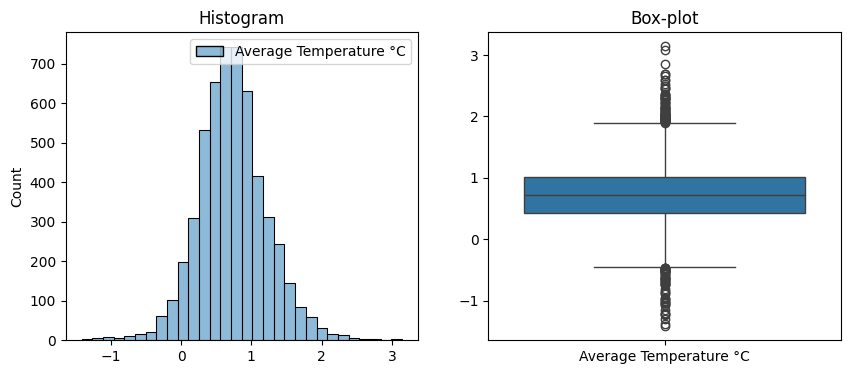

In [277]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(y_train, ax=ax[0], bins=30)
ax[0].set_title("Histogram")
sns.boxplot(y_train, ax=ax[1])
ax[1].set_title("Box-plot")
print(y_train.describe().round(2))

## Numerical Features – Fast Stats & Distributions

Numeric stats:
                             mean    std   min     max
Year                       -0.03   0.57 -1.00    0.92
Food Transport              1.49   4.82 -0.16   56.86
Food Household Consumption  1.75   8.38 -0.08  147.77
Food Retail                 1.76   7.54 -0.16  115.59
Food Processing             4.06  22.71 -0.39  325.08
IPPU                        1.24   6.45 -0.09  118.52
Area                        0.01   0.58 -0.99    1.03


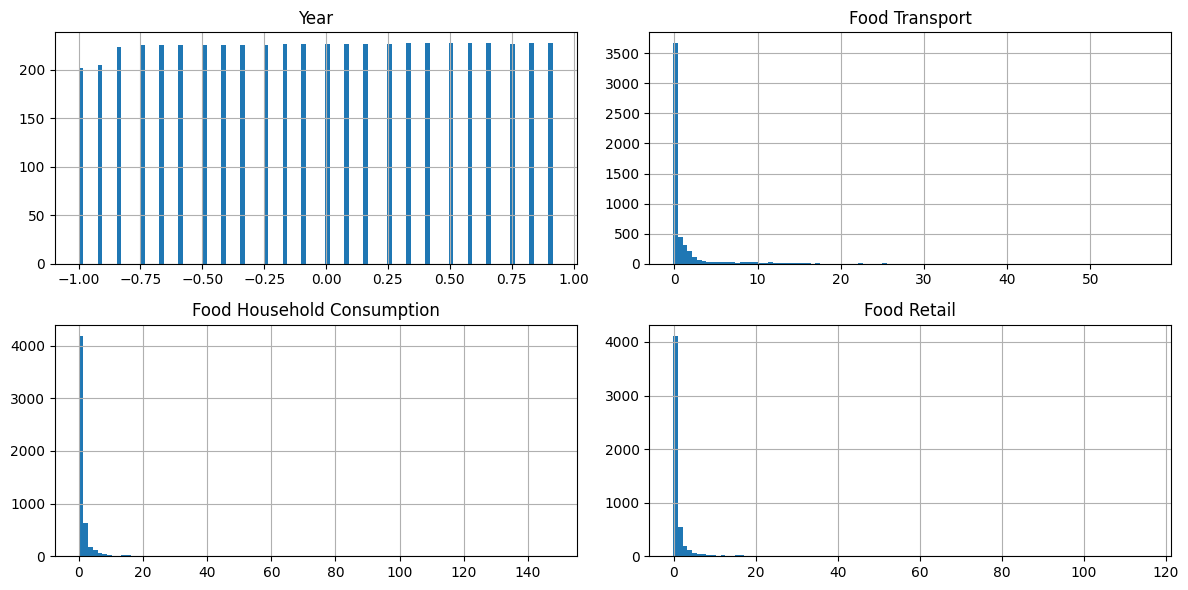

In [278]:
num_cols = X_train.select_dtypes("number").columns
print(
    "Numeric stats:\n",
    X_train[num_cols].describe().T[["mean", "std", "min", "max"]].round(2),
)
# Plot first 4 histograms*
X_train[num_cols[:4]].hist(bins=100, figsize=(12, 6))
plt.tight_layout()
plt.show()

## Numeric ↔ Target Correlation

The correlation between numerical features and your target variable reveals which features are likely to be useful predictors. This analysis helps you prioritize which features to focus on during modeling and identifies potential star performers that might drive your model's success.

**Understanding Correlation Strength:**

- |r| > 0.7: Very strong relationship - likely excellent predictor.
- 0.3 < |r| < 0.7: Moderate relationship - good predictor candidate.
- 0.1 < |r| < 0.3: Weak relationship - might be useful in combination.
- |r| < 0.1: Very weak relationship - consider removing.

Top correlations:
 Food Transport                0.064
Food Processing               0.059
Food Retail                   0.057
IPPU                          0.057
Food Household Consumption    0.053
Area                         -0.011
dtype: float64


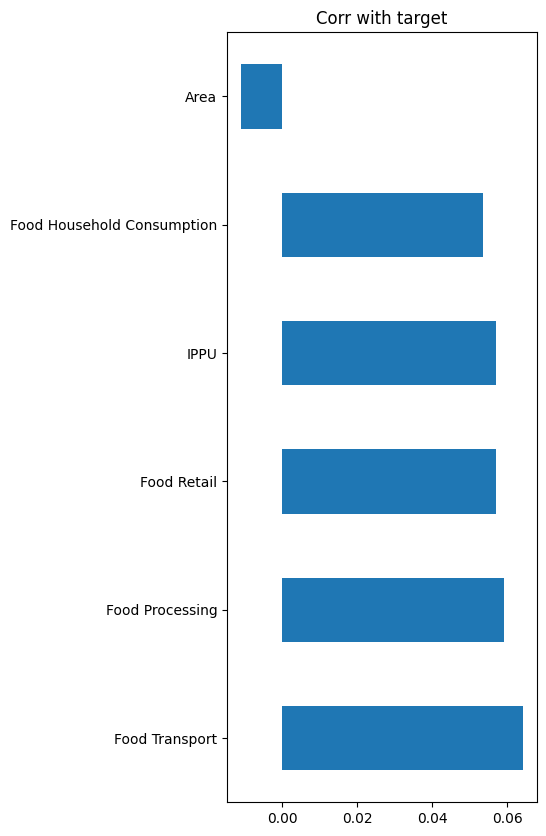

In [279]:
correlations = (
    X_train[X_train.columns.drop("Year")]
    .corrwith(y_train["Average Temperature °C"])
    .sort_values(key=abs, ascending=False)
)
print("Top correlations:\n", correlations.head(10).round(3))
correlations.head(10).plot.barh(figsize=(4, 10))
plt.title("Corr with target")
plt.show()

## Categorical Features – Frequency & Target Mean

**Key Categorical Analysis Elements:**

- **Cardinality:** How many unique categories exist.
- **Frequency distribution:** Which categories are common vs rare.
- **Target differences:** How much the target varies across categories.
- **Missing patterns:** Whether missing categorical data follows any pattern.

In [280]:
# No categorical columns left since they are already transformed above
cat_cols = X_train.select_dtypes("object").columns

for col in cat_cols:
    if X_train[col].nunique() <= 500:
        df = X_train.assign(target=y_train)
        summary = (
            df.groupby(col)["target"]
            .agg(["count", "mean"])
            .sort_values(by="count", ascending=False)
        )
        print(f"\n{col}:\n", summary)
        summary["mean"].plot.bar(figsize=(6, 3))
        plt.title(f"{col}→target")
        plt.show()

## Missing-Data Map

**Types of Missing Data Patterns:**

- **Random missing:** Scattered gaps with no clear pattern.
- **Systematic missing:** Missing values concentrated in specific rows/columns.
- **Informative missing:** Absence indicates something meaningful (e.g., "income" missing for unemployed people).

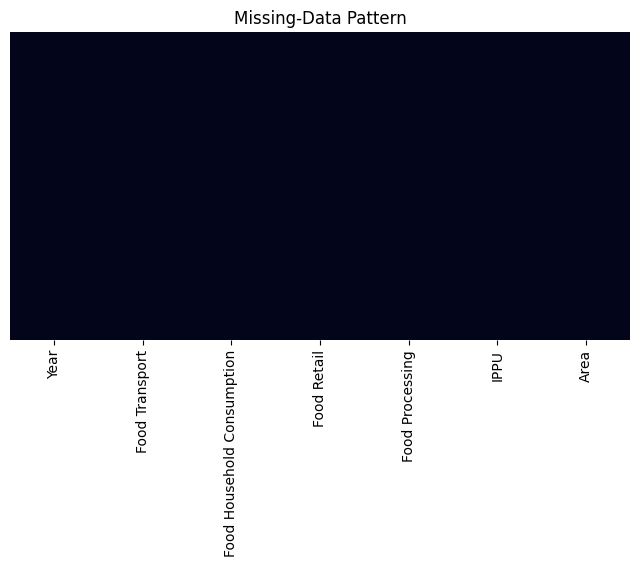

In [281]:
plt.figure(figsize=(8, 4))
sns.heatmap(X_train.isnull(), cbar=False, yticklabels=False)
plt.title("Missing-Data Pattern")
plt.show()

# Outlier Detection (IQR Rule)

Why Outliers Matter:

- **Model sensitivity:** Linear models are heavily influenced by extreme values.
- **Scale distortion:** Outliers can make normal data appear compressed.
- **Feature engineering impact:** Scaling and transformation decisions affected by extremes.

In [282]:
def iqr_outliers(s):
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    return s[(s < q1 - 1.5 * iqr) | (s > q3 + 1.5 * iqr)]


for col in num_cols[:20]:
    outs = iqr_outliers(X_train[col])
    print(f"{col}: {len(outs)} outliers ({len(outs)/len(X_train)*100:.1f}%)")

Year: 0 outliers (0.0%)
Food Transport: 692 outliers (12.9%)
Food Household Consumption: 603 outliers (11.2%)
Food Retail: 672 outliers (12.5%)
Food Processing: 826 outliers (15.4%)
IPPU: 415 outliers (7.7%)
Area: 0 outliers (0.0%)


## Feature Multicollinearity - Avoiding Redundancy

Why Multicollinearity Matters:

- **Model instability:** Small data changes can cause large coefficient changes.
- **Interpretation difficulty:** Hard to isolate individual feature effects.
- **Computational waste:** Processing redundant information.
- **Overfitting risk:** More parameters than necessary for the same predictive power.

In [283]:
corr_mat = X_train[num_cols].corr().abs()
high_corr = np.where((corr_mat > 0.8) & (corr_mat < 1.0))
pairs = [
    (num_cols[i], num_cols[j], corr_mat.iat[i, j]) for i, j in zip(*high_corr) if i < j
]
print("High-corr pairs:", pairs[:5])

High-corr pairs: [('Food Transport', 'Food Retail', np.float64(0.9001815364308873)), ('Food Household Consumption', 'Food Retail', np.float64(0.8393092838269383)), ('Food Household Consumption', 'Food Processing', np.float64(0.9491681546357045)), ('Food Household Consumption', 'IPPU', np.float64(0.9783619170095966)), ('Food Retail', 'IPPU', np.float64(0.8234486048427921))]


## EDA Summary Dashboard - Key Insights at a Glance

In [284]:
print("🚀 EDA SNAPSHOT")
print(f"Target skew: {y_train.skew()}")
print("Strongest predictor:", correlations.index[0], correlations.max().round(3))
miss = (X_train.isnull().mean() * 100).sort_values(ascending=False).head(3)
print("Top missing cols:\n", miss.round(1))
print("High-corr pairs:", pairs[:3])

🚀 EDA SNAPSHOT
Target skew: Average Temperature °C    0.151312
dtype: float64
Strongest predictor: Food Transport 0.064
Top missing cols:
 Year                          0.0
Food Transport                0.0
Food Household Consumption    0.0
dtype: float64
High-corr pairs: [('Food Transport', 'Food Retail', np.float64(0.9001815364308873)), ('Food Household Consumption', 'Food Retail', np.float64(0.8393092838269383)), ('Food Household Consumption', 'Food Processing', np.float64(0.9491681546357045))]
